# Mental Health & Social Media Analysis Notebook

## Load Datasets

In [1]:
import pandas as pd
import numpy as np

# ========== 1. Read 4 dataset ==========
stress_df = pd.read_csv("data/Stress Level Detection Based on Daily Activities.csv")
mh_df = pd.read_csv("data/mental_health_dataset.csv")
sm_balance_df = pd.read_csv("data/Mental_Health_and_Social_Media_Balance_Dataset.csv")
sm_emo_df = pd.concat([pd.read_csv("data/train.csv"), pd.read_csv("data/test.csv")], ignore_index=True)

print("Stress dataset columns:\n", stress_df.columns)
print("\nMental health dataset columns:\n", mh_df.columns)
print("\nSocial media & mental health balance columns:\n", sm_balance_df.columns)
print("\nSocial media usage & emotional well-being columns:\n", sm_emo_df.columns)


Stress dataset columns:
 Index(['Age', 'Gender', 'Work hours', 'Screen time', 'Sleep time',
       'Exercise frequency', 'Mood Stability', 'Fatigue level', 'Headache ',
       'Work_life Balance', 'Social Support'],
      dtype='object')

Mental health dataset columns:
 Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score',
       'mental_health_risk'],
      dtype='object')

Social media & mental health balance columns:
 Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')

Social media usage & emotional well-being columns:
 Index(['User_ID', 'Age', 'Gender', 'Platform', 'D

## Preprocess and Aggregate Dataset

In [2]:
from src.utils import build_from_stress_df, build_from_mh_df, build_from_sm_balance_df, build_from_sm_emo_df

df_list = [
    build_from_stress_df(stress_df),
    build_from_mh_df(mh_df),
    build_from_sm_balance_df(sm_balance_df),
    build_from_sm_emo_df(sm_emo_df)
]

full_df = pd.concat(df_list, ignore_index=True)
full_df = full_df.dropna(subset=["stress_level", "happiness_index"], how="all")

full_df["gender"] = full_df["gender"].astype(str).str.lower().str.strip()
full_df["gender"] = full_df["gender"].replace({
    "m":"male","male":"male","f":"female","female":"female",
    "non-binary":"other","other":"other"
})

mask_quality = full_df["sleep_hours"] <= 10
full_df.loc[mask_quality, "sleep_hours"] = full_df.loc[mask_quality, "sleep_hours"] / 10 * 8

full_df["platform"] = full_df["platform"].astype(str).str.title()

full_df


,age,gender,screen_time_hours,sleep_hours,exercise_freq,stress_level,happiness_index,platform
0,16 - 21,male,NaN,NaN,NaN,8.0,NaN,Nan
1,16 - 21,male,NaN,NaN,NaN,8.0,NaN,Nan
2,22 - 30,female,NaN,NaN,NaN,8.0,NaN,Nan
3,30 - 45,female,NaN,NaN,NaN,3.0,NaN,Nan
5,16 - 21,male,NaN,NaN,NaN,8.0,NaN,Nan
...,...,...,...,...,...,...,...,...
12700,29,other,1.416667,NaN,NaN,NaN,2.0,Facebook
12704,32,male,2.166667,NaN,NaN,NaN,2.0,Instagram
12708,23,other,0.833333,NaN,NaN,NaN,2.0,Linkedin
12714,22,male,1.166667,NaN,NaN,NaN,2.0,Twitter


## Data Cleaning

In [3]:
from src.utils import convert_age

df = full_df.copy()
df["age"] = df["age"].apply(convert_age)

## EDA

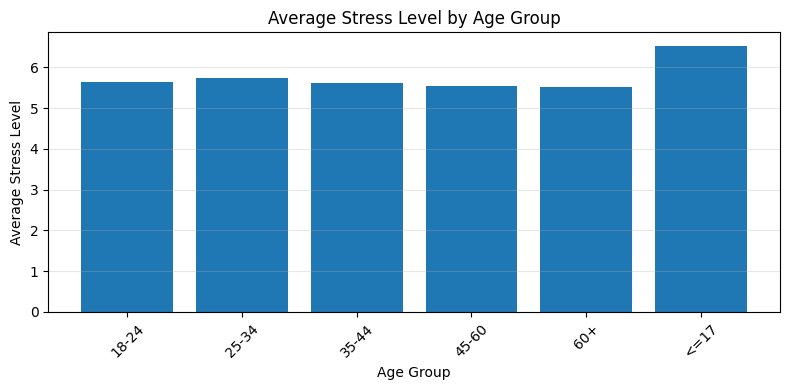

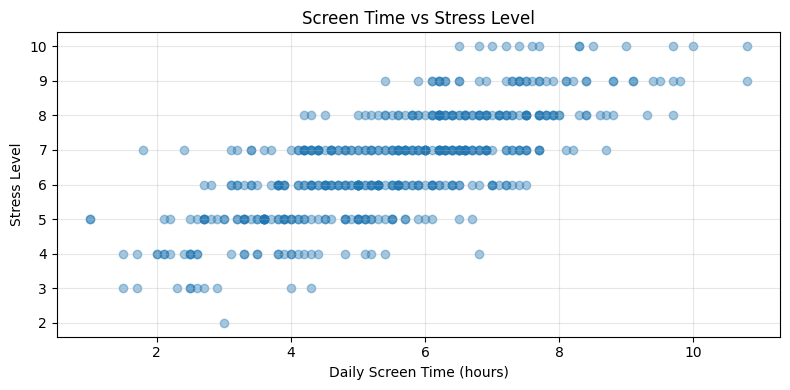

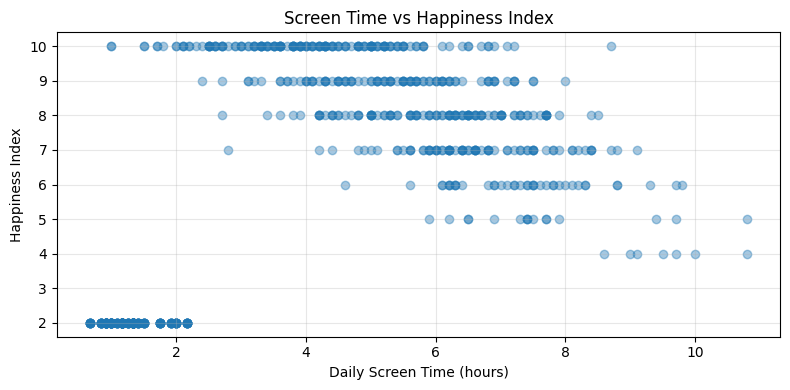

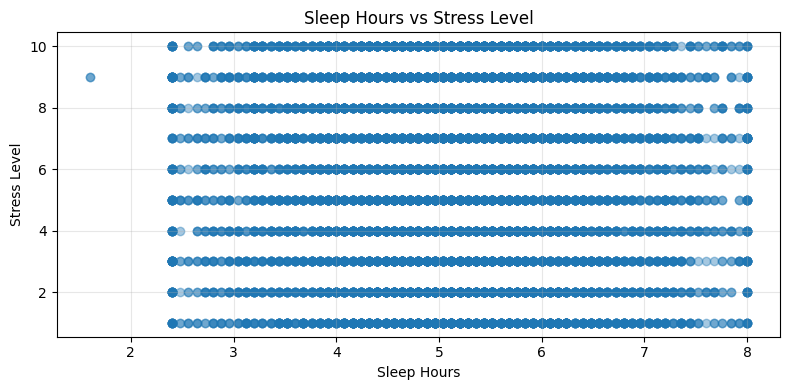

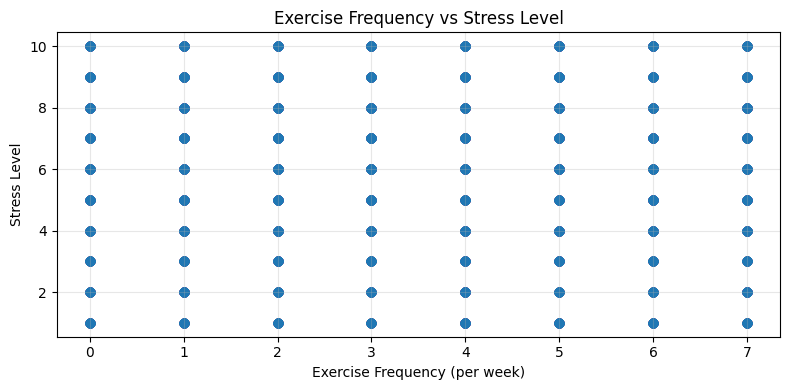

<Figure size 1200x500 with 0 Axes>

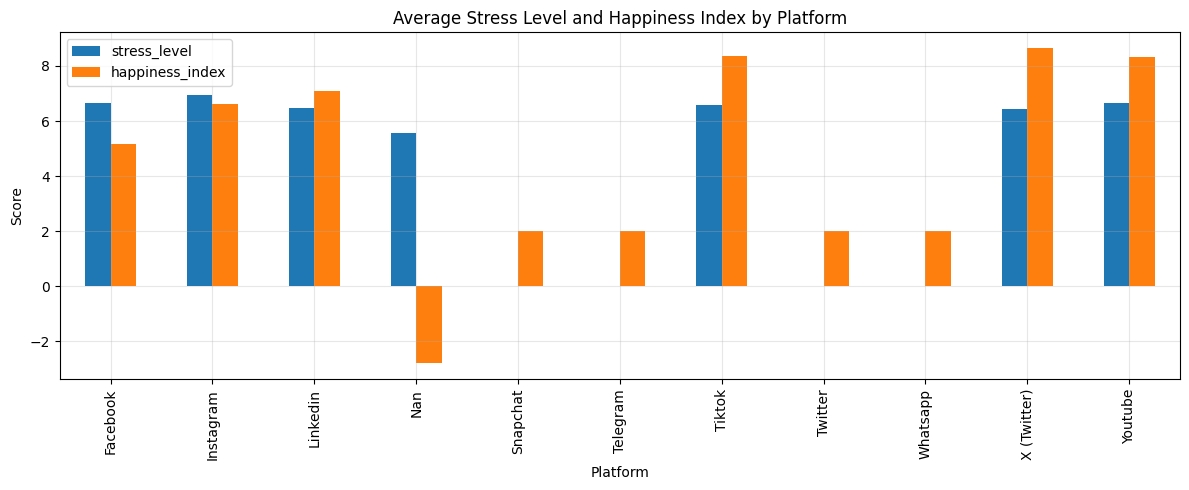

In [4]:
import matplotlib.pyplot as plt
from project.src.plotter import plot_age_v_stress, plot_screen_time_v_stress, plot_screen_time_v_happiness, plot_sleep_v_stress, plot_exercise_v_stress, plot_platform_analysis
# -------------------------------------------------------------------
# 1. Age vs Average Stress
# -------------------------------------------------------------------
plot_age_v_stress(df)
# df["age_group"] = pd.cut(
#     df["age"],
#     bins=[0, 17, 24, 34, 44, 60, 120],
#     labels=["<=17", "18-24", "25-34", "35-44", "45-60", "60+"]
# )
#
# age_valid = df.dropna(subset=["age_group", "stress_level"])
#
# age_groups = age_valid["age_group"].unique().tolist()
#
# avg_stress = [
#     age_valid[age_valid["age_group"] == g]["stress_level"].mean()
#     for g in age_groups
# ]
#
# plt.figure(figsize=(8, 4))
# plt.bar(age_groups, avg_stress)
# plt.xlabel("Age Group")
# plt.ylabel("Average Stress Level")
# plt.title("Average Stress Level by Age Group")
# plt.xticks(rotation=45)
# plt.grid(axis="y", alpha=0.3)
# plt.tight_layout()
# plt.show()

# -------------------------------------------------------------------
# 2. Screen time vs Stress
# -------------------------------------------------------------------
plot_screen_time_v_stress(df)
# clean_df = df.dropna(subset=["screen_time_hours", "stress_level"])
#
# plt.figure(figsize=(8, 4))
# plt.scatter(clean_df["screen_time_hours"], clean_df["stress_level"], alpha=0.4)
# plt.xlabel("Daily Screen Time (hours)")
# plt.ylabel("Stress Level")
# plt.title("Screen Time vs Stress Level")
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

# -------------------------------------------------------------------
# 3. Screen time vs Happiness
# -------------------------------------------------------------------
plot_screen_time_v_happiness(df)
# clean_df = df.dropna(subset=["screen_time_hours", "happiness_index"])
#
# plt.figure(figsize=(8, 4))
# plt.scatter(clean_df["screen_time_hours"], clean_df["happiness_index"], alpha=0.4)
# plt.xlabel("Daily Screen Time (hours)")
# plt.ylabel("Happiness Index")
# plt.title("Screen Time vs Happiness Index")
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

# -------------------------------------------------------------------
# 4. Sleep hours vs Stress
# -------------------------------------------------------------------
plot_sleep_v_stress(df)
# clean_df = df.dropna(subset=["sleep_hours", "stress_level"])
#
# plt.figure(figsize=(8, 4))
# plt.scatter(clean_df["sleep_hours"], clean_df["stress_level"], alpha=0.4)
# plt.xlabel("Sleep Hours")
# plt.ylabel("Stress Level")
# plt.title("Sleep Hours vs Stress Level")
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

# -------------------------------------------------------------------
# 5. Exercise vs Stress
# -------------------------------------------------------------------
plot_exercise_v_stress(df)
# clean_df = df.dropna(subset=["exercise_freq", "stress_level"])
#
# plt.figure(figsize=(8, 4))
# plt.scatter(clean_df["exercise_freq"], clean_df["stress_level"], alpha=0.4)
# plt.xlabel("Exercise Frequency (per week)")
# plt.ylabel("Stress Level")
# plt.title("Exercise Frequency vs Stress Level")
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

# -------------------------------------------------------------------
# 6. Platform analysis
# -------------------------------------------------------------------
plot_platform_analysis(full_df)
# platform_df = full_df.dropna(subset=["platform"])
# platform_df = platform_df.groupby("platform")[["stress_level","happiness_index"]].mean()
#
# # Plot bar chart
# plt.figure(figsize=(12,5))
# platform_df.plot(kind="bar", figsize=(12,5))
# plt.title("Average Stress Level and Happiness Index by Platform")
# plt.xlabel("Platform")
# plt.ylabel("Score")
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()



## Prediction Model

In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.multioutput import MultiOutputRegressor
# import xgboost as xgb
#
# feature_cols = ["age","gender","screen_time_hours","sleep_hours","exercise_freq"]
# target_cols = ["stress_level","happiness_index"]
#
# model_df = df[feature_cols + target_cols].dropna()
# X = model_df[feature_cols]
# y = model_df[target_cols]
#
# numeric_features = ["age","screen_time_hours","sleep_hours","exercise_freq"]
# categorical_features = ["gender"]
#
# numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
# categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])
#
# preprocessor = ColumnTransformer([
#     ("num", numeric_transformer, numeric_features),
#     ("cat", categorical_transformer, categorical_features),
# ])
#
# models = {
#     "LinearRegression": MultiOutputRegressor(LinearRegression()),
#     "RandomForest": MultiOutputRegressor(RandomForestRegressor(n_estimators=200)),
#     "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor()),
#     "XGBoost": MultiOutputRegressor(xgb.XGBRegressor(
#         n_estimators=300, learning_rate=0.05, max_depth=6,
#         subsample=0.9, colsample_bytree=0.9, objective='reg:squarederror'))
# }
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#
# results = {}
# for name, reg in models.items():
#     print(f"Training {name}")
#     model = Pipeline([("preprocessor", preprocessor), ("regressor", reg)])
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred, multioutput="raw_values")
#     results[name] = {"model": model, "r2": r2, "rmse": rmse}
#
# best_model_name = min(results, key=lambda x: results[x]["rmse"])
# best_model = results[best_model_name]["model"]
# best_model_name

from src.dataset import Dataset
from src.model import PredictionModel
dataset = Dataset(df)
model = PredictionModel(candidates=["LinearRegression", "RandomForest", "GradientBoosting", "XGBoost"])
model.fit(dataset.X_train, dataset.y_train, dataset.X_test, dataset.y_test)

Training LinearRegression
Training RandomForest
Training GradientBoosting
Training XGBoost


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [6]:
# These attributes are the features used for modeling
dataset.model_df

,age,gender,screen_time_hours,sleep_hours,exercise_freq,stress_level,happiness_index
11115,44.0,male,3.1,5.6,5.0,6.0,10.0
11116,30.0,other,5.1,5.6,3.0,8.0,10.0
11117,23.0,other,7.4,4.8,3.0,7.0,6.0
11118,36.0,female,5.7,5.6,1.0,8.0,8.0
11119,34.0,female,7.0,3.2,1.0,7.0,8.0
...,...,...,...,...,...,...,...
11610,23.0,male,6.9,4.0,2.0,7.0,10.0
11611,43.0,female,5.6,5.6,2.0,6.0,9.0
11612,41.0,male,7.7,4.0,2.0,7.0,8.0
11613,23.0,male,4.2,7.2,2.0,7.0,9.0


## Model Evaluation

========= Model Evaluation =========

=== Performance for: stress_level ===
R²:   0.5589
MAE:  0.8407
RMSE: 1.0307
MAPE: 0.1487
Explained Variance: 0.5632

=== Performance for: happiness_index ===
R²:   0.5421
MAE:  0.8702
RMSE: 1.0430
MAPE: 0.1124
Explained Variance: 0.5428


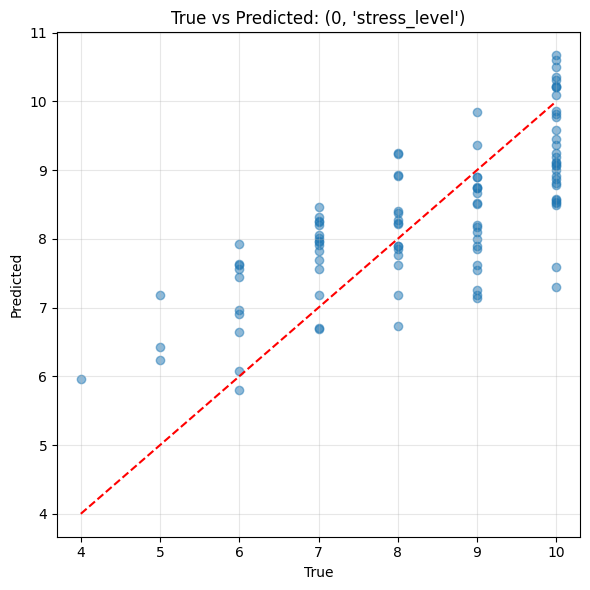

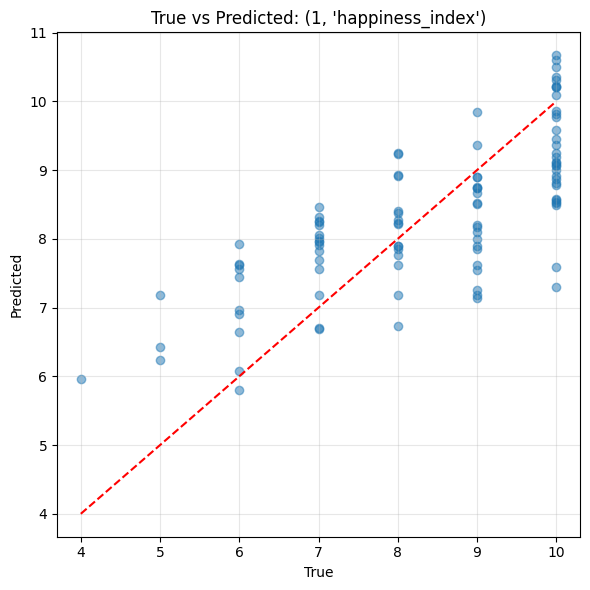

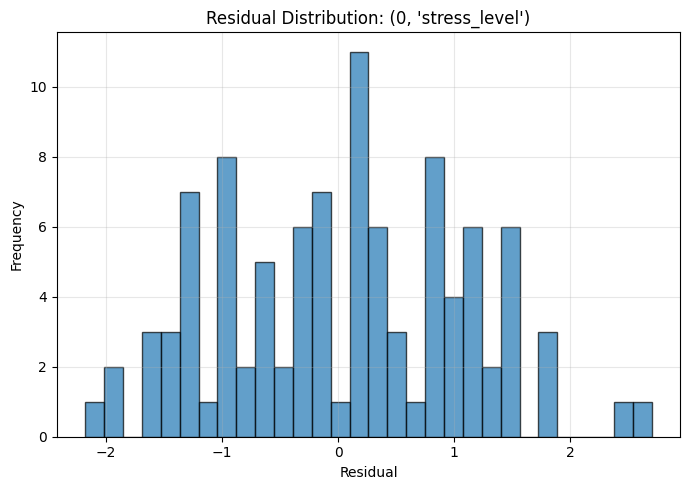

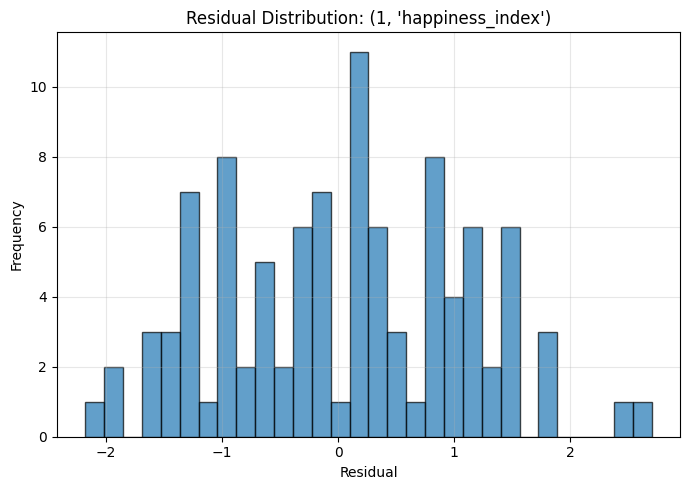

In [7]:
from project.src.plotter import plot_true_v_pred, plot_residual_distribution

# y_pred = best_model.predict(X_test)
y_pred = model.predict(dataset.X_test)
y_test = dataset.y_test
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, 
    mean_absolute_percentage_error, explained_variance_score
)
import numpy as np

print("========= Model Evaluation =========")

# Compute stress & happiness performance
targets = ["stress_level", "happiness_index"]
for i, target in enumerate(targets):
    print(f"\n=== Performance for: {target} ===")

    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    mape = mean_absolute_percentage_error(y_test.iloc[:, i], y_pred[:, i])
    ev = explained_variance_score(y_test.iloc[:, i], y_pred[:, i])

    print(f"R²:   {r2:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"Explained Variance: {ev:.4f}")

for target in enumerate(targets):
    # plt.figure(figsize=(6, 6))
    # plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5)
    # plt.xlabel("True")
    # plt.ylabel("Predicted")
    # plt.title(f"True vs Predicted: {target}")
    # plt.grid(alpha=0.3)
    # plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
    #          [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
    #          linestyle='--', color='red')
    # plt.tight_layout()
    # plt.show()
    plot_true_v_pred(y_test.iloc[:, i], y_pred[:, i], target)


for target in enumerate(targets):
    # residuals = y_test.iloc[:, i] - y_pred[:, i]
    #
    # plt.figure(figsize=(7,5))
    # plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    # plt.title(f"Residual Distribution: {target}")
    # plt.xlabel("Residual")
    # plt.ylabel("Frequency")
    # plt.grid(alpha=0.3)
    # plt.tight_layout()
    # plt.show()
    plot_residual_distribution(y_test.iloc[:, i], y_pred[:, i], target)

# Importance Score

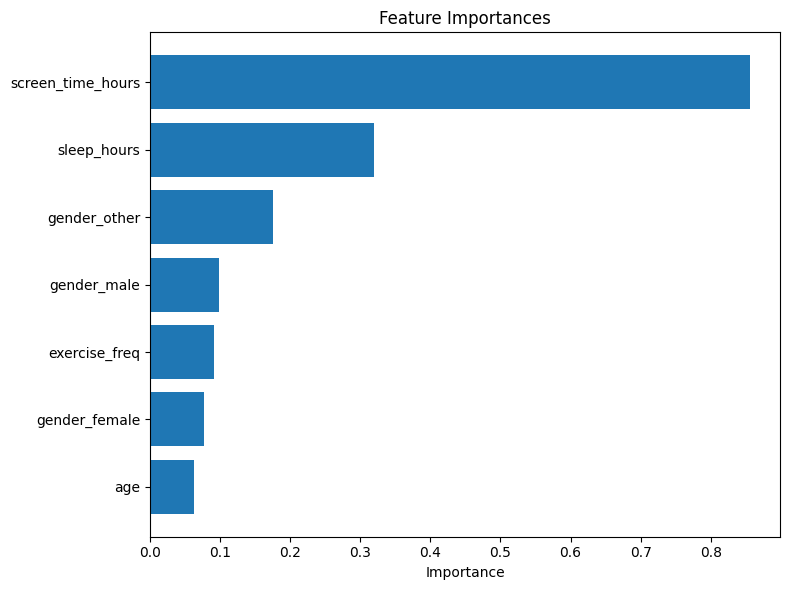

In [8]:
# Find the internal regressor of the model
# reg = best_model.named_steps["regressor"]

# Multi-output model → Take the feature importances of the first sub-model
# try:
#     importances = reg.estimators_[0].feature_importances_
# except:
#     print("This model does not provide feature importances.")
#     importances = None
#
# if importances is not None:
#     ohe = best_model.named_steps["preprocessor"].named_transformers_["cat"]["onehot"]
#     ohe_features = ohe.get_feature_names_out(["gender"])
#
#     feature_names = ["age", "screen_time_hours", "sleep_hours", "exercise_freq"] + list(ohe_features)
#
#     sorted_idx = np.argsort(importances)
#
#     plt.figure(figsize=(8, 6))
#     plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
#     plt.title("Feature Importances")
#     plt.xlabel("Importance")
#     plt.tight_layout()
#     plt.show()
from src.plotter import plot_feature_importances
feature_name, importances = model.get_importance()
plot_feature_importances(feature_name, importances)


## Usage of this model as recommender system

Ask the user to input "age	gender	screen_time_hours	sleep_hours	exercise_freq". This model can predict the predicted anxiety and happiness level. If the level is too high/low, ask the user to adjust.